# Miscellaneous Charts
1. Sunburst
2. Parallel
3. Funnel
4. Gantt
5. Ternary
6. Tree
7. Network

## Sunburst Charts

it visualize heirarchical data spanning outwards radially from root to leaves. The sector hierarchy is determined by the entries in labels and in  parents. The root starts from the center and children are added to the outer rings. Main arguments:
1. labels
2. Parents
3. Values

In [40]:
#importing library

import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data= px.data.tips()
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [3]:
px.sunburst(data, path=['sex','smoker'],values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [4]:
px.sunburst(data,path=['day','time',],values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [5]:
px.sunburst(data,path=['day','time','sex'], values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Parallel Co-ordinate Charts
- in a parallel coordinate plot each row of the DataFrame is represented by a ployline mark which traverses a set of parallel axes, one for each of the dimensions.

In [6]:
data = px.data.iris()
data.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [7]:
data[['species_id','species']].groupby('species').min()

species_id
species               
setosa               1
versicolor           2
virginica            3

In [8]:
#simple parallel coordinate chart

px.parallel_coordinates(data, color="species_id")

# Funnel Charts

- Are often used to represent data in different stages of a business process. It is  an important mechanisim in Businees Intelligence to identify potential problem areas of a process

In [12]:
data = dict(
    number=[32,34.3,56,70,134],
    stage=["Website Visit", "Downloads", "Potential Customer", "Requested Price","Invoice Sent"]
)

In [14]:
data

{'number': [32, 34.3, 56, 70, 134],
 'stage': ['Website Visit',
  'Downloads',
  'Potential Customer',
  'Requested Price',
  'Invoice Sent']}

In [15]:
px.funnel(data, x='number',y='stage')

In [18]:
stages=["Website visit", "Downloads","Potential customers","Requested price","Invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39,24,21,11,5], stage=stages))
df_mtl['office']='Montreal'
df_toronto = pd.DataFrame(dict(number=[52,36,18,14,5], stage=stages))
df_toronto['office'] ='Toronto'

df = pd.concat([df_mtl,df_toronto],axis =0)
df

number                stage    office
0      39        Website visit  Montreal
1      24            Downloads  Montreal
2      21  Potential customers  Montreal
3      11      Requested price  Montreal
4       5         Invoice sent  Montreal
0      52        Website visit   Toronto
1      36            Downloads   Toronto
2      18  Potential customers   Toronto
3      14      Requested price   Toronto
4       5         Invoice sent   Toronto

In [19]:
px.funnel(df, x='number', y='stage',color='office')

# Gantt Chart
- It is a type of bar chart that illustrates a project schedule, named after its inventor, Henry Gantt, who designed such a chart around the years 19110 - 1915 .Modern Gantt charts also show the dependency relationships between activities and current schedule status.

In [22]:
# Create dummy data for visualization
df=[
    dict(Task="Job A", Start='2022-01-01',Finish='2022-01-02'),
    dict(Task="Job B", Start='2022-02-01',Finish='2022-04-02'),
    dict(Task="Job C", Start='2022-05-01',Finish='2022-08-12'),
    dict(Task="Job D", Start='2022-10-01',Finish='2022-11-25'),
    dict(Task="Job E", Start='2022-12-01',Finish='2023-02-02')
]

fig = ff.create_gantt(df)
fig.show()

In [30]:
# Create dummy data for visualization
df=[
    dict(Task="Job A", Start='2022-01-01',Finish='2022-05-02', Resource= 'Complete'), 
    dict(Task="Job B", Start='2022-02-01',Finish='2022-04-02', Resource= 'Incomplete'),
    dict(Task="Job C", Start='2022-05-01',Finish='2022-08-12', Resource='Not Started' ),
    dict(Task="Job C", Start='2022-05-01',Finish='2022-08-12', Resource='Not Started' ),
    dict(Task="Job D", Start='2022-10-01',Finish='2022-11-25' ,Resource='Not Started'),
    dict(Task="Job E", Start='2022-12-01',Finish='2023-02-02',Resource='Not Started')]

colors = {
    'Not Started': 'rgb(220, 0, 0)',
    'Incomplete':(1,0.9,0.16),
    'Complete': 'rgb(0,255,100)'
}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True, group_tasks=True)
fig.show()


# Ternary Chart
- It is a barycentric plot on three variables which sum to a constant. It graphically depicts the ratios of the three variables as positions  in an equilateral triangle.

In [31]:
data = px.data.iris()
data.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [33]:
px.scatter_ternary(data, 
                   a="sepal_length", 
                   b='sepal_width',
                   c="petal_length",
                  color="species",
                  color_discrete_map={"sepal_length":"blue",
                                     "sepal_width":"green",
                                      "petal_width":"red"
                                     })

# Tree Maps
- It visualize hierarchical data using nested rectangles. Same as Sunburst the hierarchy is defined by labels and parents attributes.

In [34]:
data = px.data.tips()
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [35]:
px.treemap(data, path=['day'],values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
px.treemap(data, path=['day','time'],values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
px.treemap(data, path=['day','sex','time'],values='total_bill')

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\walid\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Network Charts
- It show interconnection between a set of entities. Each entity is represented by a node. connection between nodes are represented through links.

In [41]:
data = px.data.gapminder()
data.shape
data.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [42]:
data['nation']='Country'
data= nx.from_pandas_edgelist(data, source='nation', target='country', edge_attr=True,)

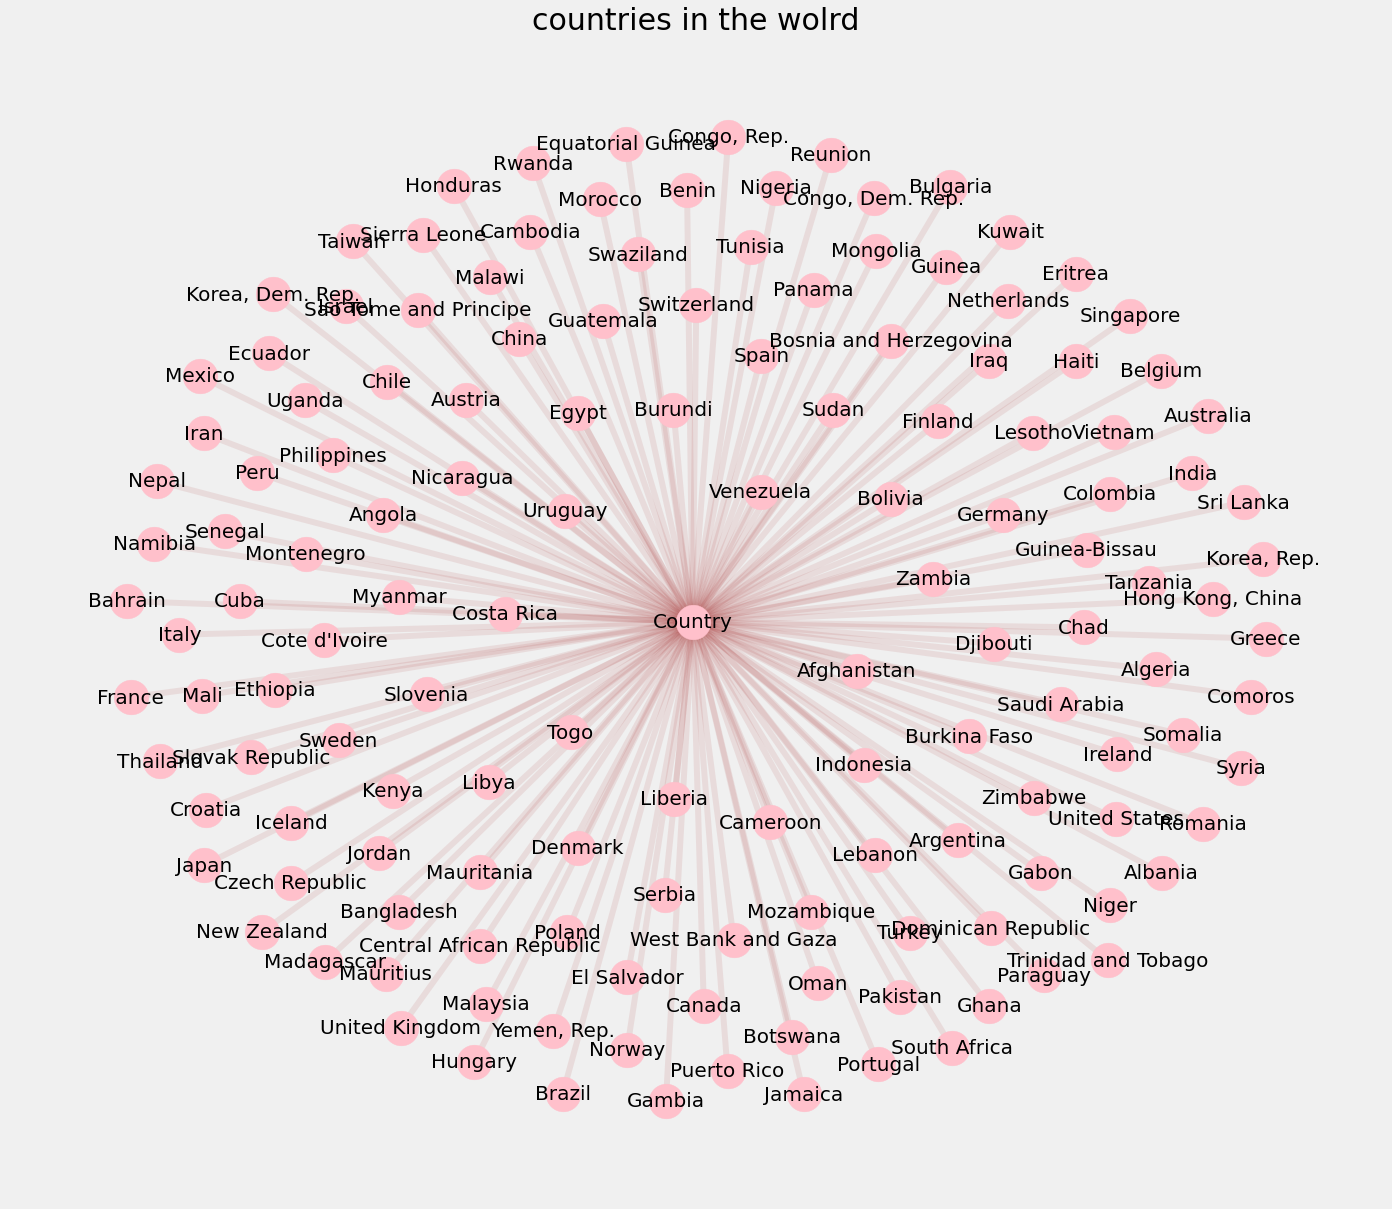

In [44]:
import warnings # warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (22, 20)
plt.style.use('fivethirtyeight')
plt.title('countries in the wolrd', fontsize=30)
plt.grid()
plt.axis()

pos = nx.spring_layout(data)

#nodes drawing

nx.draw_networkx_nodes(data, pos, node_size=1200,node_color='pink')

#labels

nx.draw_networkx_labels(data,pos,font_size=20, font_family='sans-serif')


#edges

nx.draw_networkx_edges(data,pos,width=6, alpha=0.1, edge_color='brown')



plt.show()
